In [1]:
# Ten class classification problem cifar dataset popular dataset we get feer dataset when we download keras

In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from keras.datasets import cifar10

In [4]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
# lets look at the one image

In [7]:
x_train[0].shape

(32, 32, 3)

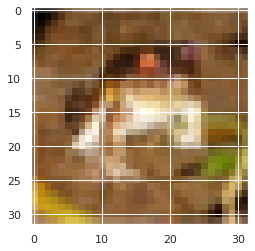

In [8]:
plt.imshow(x_train[0])

In [9]:
#we cannot make it from the image so lets check the target varible to knw which image it is

In [11]:
y_train[0]

array([6], dtype=uint8)

In [12]:
# so its labled as frog in the cifar dataset

In [13]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Change the Datatype to Float and Normalize it

In [14]:
x_train=x_train.astype('float64')/255   # we do normalization as we knw there is no chance of out lier as the data is of image format and it cannot be more than 255. 
x_test=x_test.astype('float64')/255    # so their is no chance of the sadanderdiation as the dat is normal but we have to do normalisation to bring the data into 0 and 1. so we have diveded it with 255

In [15]:
x_train.dtype

dtype('float64')

In [16]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [17]:
# many deep learning libraries needs the target variable in one hot encoded format for multiclass classification problem

In [19]:
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [20]:
num_classes= len(np.unique(y_train)) # to know the no of classes present which is 10

In [21]:
num_classes

10

In [22]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [23]:
y_train= to_categorical(y_train,num_classes) # here we have to provide the dependent variable data and the no of the classes in the dependent variable.
y_test=to_categorical(y_test,num_classes)


In [24]:
y_train # now we can see that it is in the one hot encoded format

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
#Divide the Training Dataset into validation and Training
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [27]:
print(y_train.shape)
print(x_train.shape)
print(y_valid.shape)
print(x_valid.shape)

(45000, 10)
(45000, 32, 32, 3)
(5000, 10)
(5000, 32, 32, 3)


In [28]:
# Import deep learning libraries

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [30]:
model=Sequential()

In [31]:
# here we are using 16 filter and the kernal size is 3 meaning 3*3*input depth(of filter) and the input shape is shape of the image which is 32*32*3
# default stride is 1 in keras for conv layer
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3))) 
model.add(MaxPooling2D(pool_size=2)) #a 2*2 max pooling layer with stride = 2

In [32]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu')) # here we dont have to provide the input shape as it automatically gets the input shape form the 1st layer
model.add(MaxPooling2D(pool_size=2))

In [33]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [35]:
model.add(Flatten())

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

Stack an ANN on top of CNN

In [37]:
#dense id fully connected layers , no of neurons are 512 and kernal initializer is nothing but how the weights are initilized let it be default no need of giving the values
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [38]:
# adding the final layer and the unit 10 specify the no of the classes of the images. and if it was binary then unit will be one and the acitivation will be sigmoid.
model.add(Dense(units=10,activation='softmax',kernel_initializer='uniform')) 

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [40]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [42]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=10,verbose=2,batch_size=500)

Epoch 1/10
90/90 - 27s - loss: 2.0406 - accuracy: 0.2172 - val_loss: 1.8134 - val_accuracy: 0.3230 - 27s/epoch - 299ms/step
Epoch 2/10
90/90 - 27s - loss: 1.7354 - accuracy: 0.3396 - val_loss: 1.6512 - val_accuracy: 0.3766 - 27s/epoch - 301ms/step
Epoch 3/10
90/90 - 26s - loss: 1.6360 - accuracy: 0.3829 - val_loss: 1.5728 - val_accuracy: 0.4170 - 26s/epoch - 292ms/step
Epoch 4/10
90/90 - 27s - loss: 1.5462 - accuracy: 0.4193 - val_loss: 1.5185 - val_accuracy: 0.4364 - 27s/epoch - 296ms/step
Epoch 5/10
90/90 - 26s - loss: 1.4747 - accuracy: 0.4523 - val_loss: 1.4714 - val_accuracy: 0.4652 - 26s/epoch - 289ms/step
Epoch 6/10
90/90 - 26s - loss: 1.4220 - accuracy: 0.4748 - val_loss: 1.4110 - val_accuracy: 0.4910 - 26s/epoch - 290ms/step
Epoch 7/10
90/90 - 26s - loss: 1.3786 - accuracy: 0.4948 - val_loss: 1.3654 - val_accuracy: 0.5050 - 26s/epoch - 291ms/step
Epoch 8/10
90/90 - 26s - loss: 1.3551 - accuracy: 0.5046 - val_loss: 1.3662 - val_accuracy: 0.5006 - 26s/epoch - 290ms/step
Epoch 9/

In [43]:
# evaluate the result
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.2842 - accuracy: 0.5370


In [44]:
answers.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

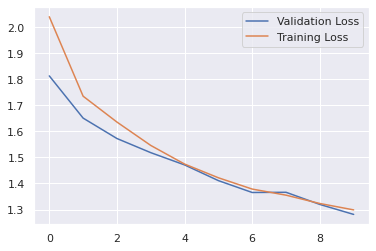

In [48]:
plt.plot(answers.history['val_loss'],label='Validation Loss');
plt.plot(answers.history['loss'],label='Training Loss');
plt.legend();

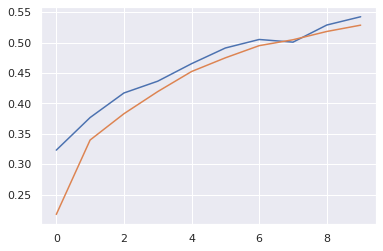

In [49]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy');
plt.plot(answers.history['accuracy'],label='Training Accuracy');
plt.legend;